# Introduction  
* This dataset contains a record for patients showing for their medical appointments, you have a set of features that are self-explanatory and a label **No-show**, predict whether a patient will show for his appointment or not.

* You are **ENCOURAGED** to copy code from the internet, use Github Co-pilot, ask chat GPT, ask me, ask other students. but don't copy the whole project, **I will know**, and you will get zero. and the person who gave it to you. As long as you prove to me that you put in the effort, I will give you full mark. 

* The outlines here are **NOT Questions**, they are designed to guide you, but you are free to remove them and deal with the data as you see. 

* The results of the model are not important, as long as show me the predictions on the test set, that you understand the code you ***supposedly*** wrote, and justify the steps you have taken, you will get full mark.

* Try to solve the bonus questions, to get a bonus.

# The Training Phase

#### Import pandas and all the necessary libraries.

In [94]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

#### Load the dataset, split it into 70% training set and 30% test set.
save the training set in a file called training.csv, and the test set in a file called test.csv. don't forget to shuffle the dataframe before splitting.
**Hint:** don't `use train_test_split()`, instead, use pandas `iloc[]` function.

In [2]:
df = pd.read_csv('Appointment dataset.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# shuffle the DataFrame rows
df = df.sample(frac = 1)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
72857,1.372193e+13,5657546,F,2016-05-04T09:33:03Z,2016-05-11T00:00:00Z,50,ANDORINHAS,0,1,0,0,0,1,No
11678,7.323343e+12,5699513,F,2016-05-16T08:35:36Z,2016-05-16T00:00:00Z,32,REDENÇÃO,0,0,0,0,0,0,No
40543,6.995217e+14,5689547,M,2016-05-12T08:40:57Z,2016-05-12T00:00:00Z,52,ROMÃO,0,1,0,0,0,0,No
11490,4.893995e+14,5613038,M,2016-04-25T08:57:42Z,2016-05-11T00:00:00Z,39,ILHA DE SANTA MARIA,0,0,0,0,0,1,No
62019,5.919397e+12,5676029,F,2016-05-09T14:51:27Z,2016-05-09T00:00:00Z,26,PRAIA DO SUÁ,0,0,0,1,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 72857 to 67177
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


# Splitting data with iloc

In [5]:
train_df = df.iloc[:int(0.7*len(df)),:]
test_df = df.iloc[int(0.7*len(df)):,:]
train_df.shape, test_df.shape

((77368, 14), (33159, 14))

# Saving trainig and test data

train_df.to_csv(r'Downloads\training.csv')
test_df.to_csv(r'Downloads\test.csv')

#### Load the file training.csv that you saved in a new data frame.

In [6]:
training = pd.read_csv(r'Downloads\training.csv',index_col=0)
training.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
13693,7.883255e+13,5659950,F,2016-05-04T15:09:11Z,2016-05-04T00:00:00Z,15,ILHA DE SANTA MARIA,0,0,0,0,0,0,No
31417,2.375891e+13,5681918,M,2016-05-10T15:23:55Z,2016-05-11T00:00:00Z,1,GURIGICA,0,0,0,0,0,0,No
9497,9.639517e+13,5672295,F,2016-05-09T07:53:35Z,2016-05-09T00:00:00Z,39,CRUZAMENTO,0,0,0,0,0,0,Yes
41755,5.148435e+12,5745324,F,2016-05-30T11:43:27Z,2016-05-31T00:00:00Z,22,BELA VISTA,0,0,0,0,0,0,Yes
47548,9.892600e+13,5656524,F,2016-05-04T08:10:28Z,2016-05-30T00:00:00Z,63,JUCUTUQUARA,0,1,0,0,0,1,No


#### View information about the dataset.

In [7]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77368 entries, 13693 to 73002
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       77368 non-null  float64
 1   AppointmentID   77368 non-null  int64  
 2   Gender          77368 non-null  object 
 3   ScheduledDay    77368 non-null  object 
 4   AppointmentDay  77368 non-null  object 
 5   Age             77368 non-null  int64  
 6   Neighbourhood   77368 non-null  object 
 7   Scholarship     77368 non-null  int64  
 8   Hipertension    77368 non-null  int64  
 9   Diabetes        77368 non-null  int64  
 10  Alcoholism      77368 non-null  int64  
 11  Handcap         77368 non-null  int64  
 12  SMS_received    77368 non-null  int64  
 13  No-show         77368 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 8.9+ MB


In [8]:
training.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,7.736800e+04,7.736800e+04,77368.000000,77368.000000,77368.000000,77368.000000,77368.000000,77368.000000,77368.000000
mean,1.483855e+14,5.675447e+06,37.102006,0.097586,0.196994,0.072007,0.031046,0.022322,0.321309
std,2.568659e+14,7.139469e+04,23.133948,0.296755,0.397730,0.258500,0.173444,0.162161,0.466982
min,1.417242e+05,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175978e+12,5.640358e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.183676e+13,5.680686e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.455566e+13,5.725919e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790466e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Clean the dataset.
drop the useless columns, deal with the null values.   
will you drop the rows, or use pandas mean(), or use sklearn simple Imputer?

In [9]:
cleaned_training = training[['Age','Neighbourhood','Gender','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No-show']]
cleaned_training.head()

,Age,Neighbourhood,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
13693,15,ILHA DE SANTA MARIA,F,0,0,0,0,0,0,No
31417,1,GURIGICA,M,0,0,0,0,0,0,No
9497,39,CRUZAMENTO,F,0,0,0,0,0,0,Yes
41755,22,BELA VISTA,F,0,0,0,0,0,0,Yes
47548,63,JUCUTUQUARA,F,0,1,0,0,0,1,No


#### [BONUS++] Detect if there are any outliers in the dataset, if any, how will you deal with them ?

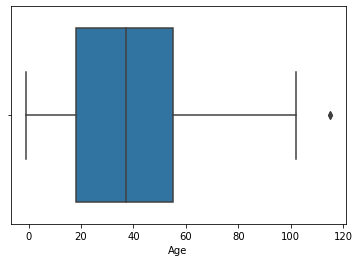

In [10]:
sns.boxplot(data= cleaned_training, x='Age')
plt.show()

# Drop outliers

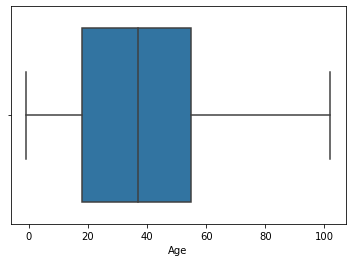

In [11]:
cleaned_training= cleaned_training.drop(cleaned_training[cleaned_training['Age']==115].index)
sns.boxplot(data= cleaned_training, x='Age')
plt.show()

#### Provide at least one drawing (histogram, pie chart, etc ..) that you see fit, about the dataset.

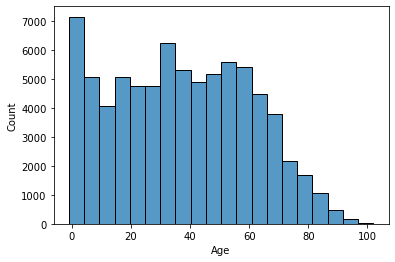

In [12]:
sns.histplot(data= cleaned_training,x='Age', bins=20)
plt.show()

#### Draw a pie chart for show vs no-show appointments.

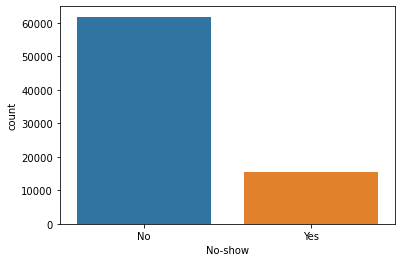

In [13]:
sns.countplot(data= cleaned_training,x='No-show')
plt.show()

In [14]:
cleaned_training['No-show'].describe()

count     77366
unique        2
top          No
freq      61782
Name: No-show, dtype: object

In [15]:
cleaned_training['No-show']= cleaned_training['No-show'].map({'Yes':1,'No':0})
cleaned_training['No-show'].describe()

count    77366.000000
mean         0.201432
std          0.401073
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: No-show, dtype: float64

plt.pie(cleaned_training['No-show'])
plt.show() 

#### Use One Hot Encoder to encode the gender column.

In [16]:
encoded_df = pd.get_dummies(cleaned_training, columns=['Gender'])
encoded_df.head()

,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Gender_F,Gender_M
13693,15,ILHA DE SANTA MARIA,0,0,0,0,0,0,0,1,0
31417,1,GURIGICA,0,0,0,0,0,0,0,0,1
9497,39,CRUZAMENTO,0,0,0,0,0,0,1,1,0
41755,22,BELA VISTA,0,0,0,0,0,0,1,1,0
47548,63,JUCUTUQUARA,0,1,0,0,0,1,0,1,0


#### Use Ordinal Encoder to encode the Neighborhood column.    
One hot encoder would've been better, but we have many features (81) so we can't use it because of the dimensionality. powerful classifiers such as XGBoost can deal with this, but linear ones such as linear regression will suffer.

In [17]:
encoded_df = pd.get_dummies(cleaned_training, columns=['Neighbourhood'])
encoded_df.head()

,Age,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Neighbourhood_AEROPORTO,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
13693,15,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31417,1,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9497,39,F,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
41755,22,F,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
47548,63,F,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Use label encoder to encode the No-show column.  
The most misused encoder in the whole ML, label encoder and ordinal encoder are exactly the same, but for some stupid reason that nobody knows (if you can find the reason I will give you red bull), sklearn has two versions of it, ordinal encoder for encoding multiple features (the X), and label encoder for encoding a single feature (y). you will see many armatures doing a for loop and using label encoder instead of just using ordinal encoder. ML coding is a mess I know !.

In [18]:
encoded_df = pd.get_dummies(cleaned_training, columns=['No-show'])
encoded_df.head()

,Age,Neighbourhood,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show_0,No-show_1
13693,15,ILHA DE SANTA MARIA,F,0,0,0,0,0,0,1,0
31417,1,GURIGICA,M,0,0,0,0,0,0,1,0
9497,39,CRUZAMENTO,F,0,0,0,0,0,0,0,1
41755,22,BELA VISTA,F,0,0,0,0,0,0,0,1
47548,63,JUCUTUQUARA,F,0,1,0,0,0,1,1,0


#### Create a new column called late duration.  
Find the date difference in hours or days between the column ScheduledDay and the column AppointmentDay, use it to create the new column, and don't forget to drop the old columns.

In [19]:
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore') # ignore the warnings

cleaned_training['new_duration'] = pd.to_datetime(training['AppointmentDay']) - pd.to_datetime(training['ScheduledDay'])
cleaned_training[['new_duration']].head(20)



,new_duration
13693,-1 days +08:50:49
31417,0 days 08:36:05
9497,-1 days +16:06:25
41755,0 days 12:16:33
47548,25 days 15:49:32
44028,-1 days +16:04:56
83048,20 days 14:29:32
89397,-1 days +15:48:09
50949,-1 days +16:50:07
49580,-1 days +13:30:17


#### Split the training data frame into X and y 

In [28]:
x_train = train_df[['Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']]
y_train = train_df[['No-show']]

x_test = test_df[['Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']]
y_test = test_df[['No-show']]

#### Train a Preceptron Classifier, tune it's hyperparameters use GridsearchCV.    

In [75]:
# Create a perceptron classifier and fit it to the training data
clf = Perceptron(max_iter=1000, random_state=42)
clf.fit(x_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(x_test)

# Print the accuracy of the classifier
print("Accuracy:", clf.score(x_test, y_test))

Accuracy: 0.7860610995506498


#### Print the classification report for the best estimator.  

In [76]:
##Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.80      0.98      0.88     26419
         Yes       0.30      0.04      0.07      6740

    accuracy                           0.79     33159
   macro avg       0.55      0.51      0.47     33159
weighted avg       0.70      0.79      0.71     33159



#### Plot the confusion matrix.  

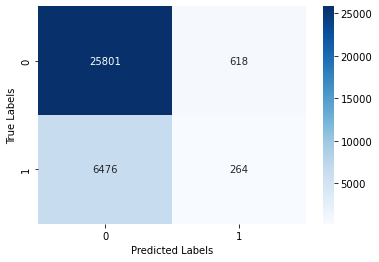

In [77]:
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### [BONUS] Try other classifiers  
try XGBoost, CatBoost, Light GBM, decision tree and plot the tree, compare between the classifiers, draw a bar plot comparing different classifiers. try a library called Lazy Predict. Try some Auto ML Libraries like PyCaret.   

In [78]:

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

#test the model with the test data
y_pred=log_reg.predict(x_test)

#calculate the accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', log_reg_accuracy,'\n')



Accuracy:  0.7967369341656866 



In [79]:
##Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.80      1.00      0.89     26419
         Yes       0.00      0.00      0.00      6740

    accuracy                           0.80     33159
   macro avg       0.40      0.50      0.44     33159
weighted avg       0.63      0.80      0.71     33159



#### Save the model as a pkl file.


In [80]:
with open('Perceptron.pkl', 'wb') as f:
    pickle.dump(clf, f)

#### [BONUS] SkLearn Pipelines  
If you are able to make this into a single sklearn pipeline (ColumnTransformer-> Onehotencoder -> StandardScaler-> SVM) pkl file, I will give you full mark + bonus + 10 pounds. to get the bonus I need your production code to look like this: `model = pkl.load(model) - model.predict(test set)` all in a single sklearn pipeline, no pandas no nothing.  

# The Production Phase !    

#### Load the test set, do your transformations as you did with the training set. 

In [81]:
df2 = pd.read_csv('test.csv')
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,136,74,26,135,26.0,0.647,51
1,1,151,60,0,0,26.1,0.179,22
2,6,109,60,27,0,25.0,0.206,27
3,3,61,82,28,0,34.4,0.243,46
4,1,116,78,29,180,36.1,0.496,25


In [82]:
# shuffle the DataFrame rows
df2 = df.sample(frac = 1)
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
212,7,107,74,0,0,29.6,0.254,31
193,5,111,72,28,0,23.9,0.407,27
147,6,80,66,30,0,26.2,0.313,41
201,4,151,90,38,0,29.7,0.294,36
7,1,119,54,13,50,22.3,0.205,24


In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 212 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               231 non-null    int64  
 1   Glucose                   231 non-null    int64  
 2   BloodPressure             231 non-null    int64  
 3   SkinThickness             231 non-null    int64  
 4   Insulin                   231 non-null    int64  
 5   BMI                       231 non-null    float64
 6   DiabetesPedigreeFunction  231 non-null    float64
 7   Age                       231 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 16.2 KB


In [84]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,4.047619,120.645022,69.463203,22.848485,85.142857,32.349784,0.480524,33.073593
std,3.401072,33.673037,17.500241,15.731124,121.000903,8.356450,0.327634,11.287112
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,96.500000,64.000000,11.000000,0.000000,27.800000,0.245500,24.000000
50%,4.000000,116.000000,72.000000,26.000000,51.000000,32.400000,0.407000,30.000000
75%,6.000000,141.000000,78.000000,33.500000,129.500000,37.050000,0.638500,40.000000
max,17.000000,199.000000,110.000000,63.000000,846.000000,59.400000,2.420000,81.000000


In [56]:
cleaned_test = test_df[['Age','Neighbourhood','Gender','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No-show']]
cleaned_test.head()

,Age,Neighbourhood,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
42290,0,MARIA ORTIZ,M,0,0,0,0,0,1,No
77276,58,SANTO ANTÔNIO,M,0,1,1,0,0,0,No
21746,57,SÃO PEDRO,F,0,1,1,0,1,0,Yes
22099,85,VILA RUBIM,F,0,0,0,0,0,0,No
61642,27,CONSOLAÇÃO,F,0,0,0,0,0,0,No


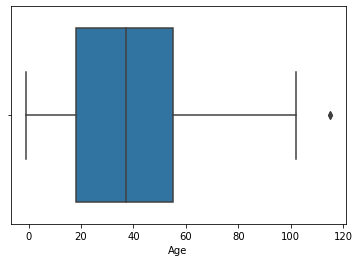

In [57]:
sns.boxplot(data= cleaned_test, x='Age')
plt.show()

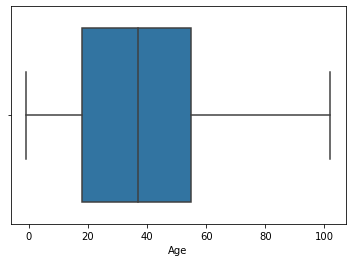

In [86]:
cleaned_test= cleaned_test.drop(cleaned_test[cleaned_test['Age']==115].index)
sns.boxplot(data= cleaned_test, x='Age')
plt.show()

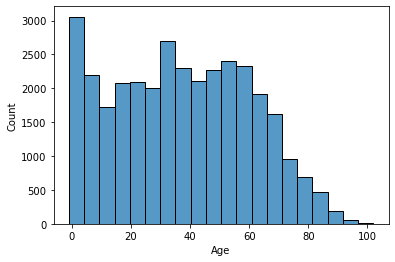

In [87]:
sns.histplot(data= cleaned_test,x='Age', bins=20)
plt.show()

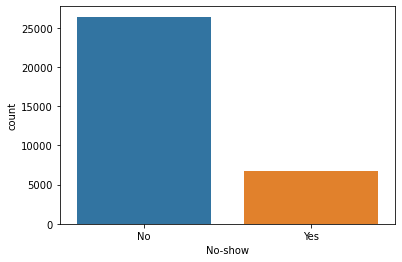

In [88]:
sns.countplot(data= cleaned_test,x='No-show')
plt.show()

In [89]:
cleaned_test['No-show']= cleaned_test['No-show'].map({'Yes':1,'No':0})
cleaned_test['No-show'].describe()

count    33157.000000
mean         0.203245
std          0.402419
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: No-show, dtype: float64

In [90]:
encoded_df = pd.get_dummies(cleaned_test, columns=['Gender'])
encoded_df.head()

,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Gender_F,Gender_M
42290,0,MARIA ORTIZ,0,0,0,0,0,1,0,0,1
77276,58,SANTO ANTÔNIO,0,1,1,0,0,0,0,0,1
21746,57,SÃO PEDRO,0,1,1,0,1,0,1,1,0
22099,85,VILA RUBIM,0,0,0,0,0,0,0,1,0
61642,27,CONSOLAÇÃO,0,0,0,0,0,0,0,1,0


In [91]:
encoded_df = pd.get_dummies(cleaned_test, columns=['Neighbourhood'])
encoded_df.head()

,Age,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Neighbourhood_AEROPORTO,...,Neighbourhood_SANTOS REIS,Neighbourhood_SEGURANÇA DO LAR,Neighbourhood_SOLON BORGES,Neighbourhood_SÃO BENEDITO,Neighbourhood_SÃO CRISTÓVÃO,Neighbourhood_SÃO JOSÉ,Neighbourhood_SÃO PEDRO,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM
42290,0,M,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
77276,58,M,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21746,57,F,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
22099,85,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
61642,27,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
encoded_df = pd.get_dummies(cleaned_test, columns=['No-show'])
encoded_df.head()

,Age,Neighbourhood,Gender,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show_0,No-show_1
42290,0,MARIA ORTIZ,M,0,0,0,0,0,1,1,0
77276,58,SANTO ANTÔNIO,M,0,1,1,0,0,0,1,0
21746,57,SÃO PEDRO,F,0,1,1,0,1,0,0,1
22099,85,VILA RUBIM,F,0,0,0,0,0,0,1,0
61642,27,CONSOLAÇÃO,F,0,0,0,0,0,0,1,0


#### Load the model from the pkl file, use it to predict on the test set.

In [67]:
with open('Perceptron.pkl', 'rb') as f:
    model = pickle.load(f)

In [68]:
print(model)

Perceptron(random_state=42)


#### Print the classification report.  
reflect on the results in terms of F1 score, precision and recall. Is the model overfitting, underfitting and why?

In [69]:
##Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.80      1.00      0.89     26419
         Yes       0.00      0.00      0.00      6740

    accuracy                           0.80     33159
   macro avg       0.40      0.50      0.44     33159
weighted avg       0.63      0.80      0.71     33159



#### Plot the confusion matrix, reflect on the results

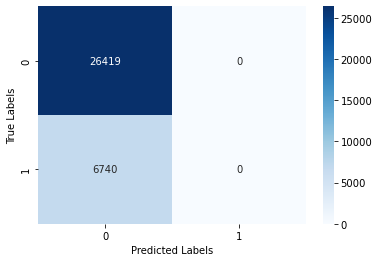

In [85]:
# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Compare the training accuracy vs test accuracy.
reflect on the results, is your model underfitting or overfitting? and why?.  
Draw a bar plot comparing the two.  

In [98]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

# calculate the training accuracy
train_accuracy = clf.score(x_train, y_train)

# calculate the test accuracy
test_accuracy = clf.score(x_test, y_test)

# print the training and test accuracies
print("Training accuracy: {:.2f}%".format(train_accuracy*100))
print("Test accuracy: {:.2f}%".format(test_accuracy*100))

Training accuracy: 80.15%
Test accuracy: 79.50%


#### [BONUS] Can you plot the decision boundaries for 2 features?  
Hint: steal some code form the internet, google: python plot decision boundary or ask chatGPT

#### [BONUS++++] Deployment  
Can you deploy this? use your .edu email to create a free azure for students account. think of fast API, Flask with Azure web service or just python function with Azure Functions (like AWS Lambda) call your API using Postman.  

# The End
Congratulations, you made it this far, upload the project to github, add it to your CV.